# load data and test pandas



In [4]:
import numpy as np
import pandas as pd

In [5]:
spf_df=pd.read_csv("StudentsPerformance.csv")

In [6]:
spf_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
spf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
spf_df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
spf_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


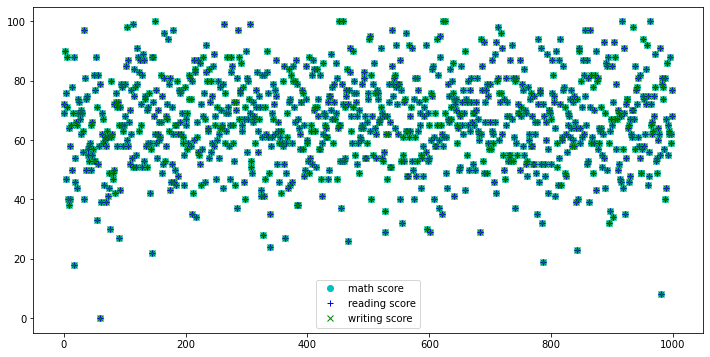

In [10]:
# biểu đồ line
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(spf_df['math score'],"oc")
plt.plot(spf_df['math score'],"+b")
plt.plot(spf_df['math score'],"xg")
plt.legend(['math score','reading score','writing score'])

Text(0, 0.5, 'number of score')

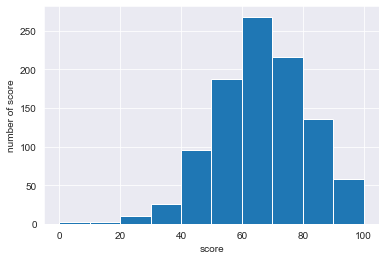

In [11]:
# histogram
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
plt.hist(spf_df['math score'])
plt.xlabel('score')
plt.ylabel('number of score')
#spf_df['reading score']

In [12]:
spf_df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

([<matplotlib.patches.Wedge at 0x1f638d75910>,
 [Text(0.06217041096298411, -1.0982417038160106, 'female'),
  Text(-0.06217041096298397, 1.0982417038160106, 'male')],
 [Text(0.033911133252536786, -0.5990409293541875, '51.8%'),
  Text(-0.03391113325253671, 0.5990409293541875, '48.2%')])

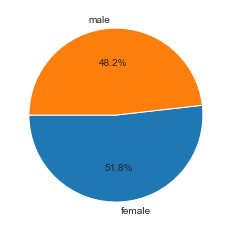

In [13]:
gender_counts=spf_df['gender'].value_counts()
plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%', startangle=180)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

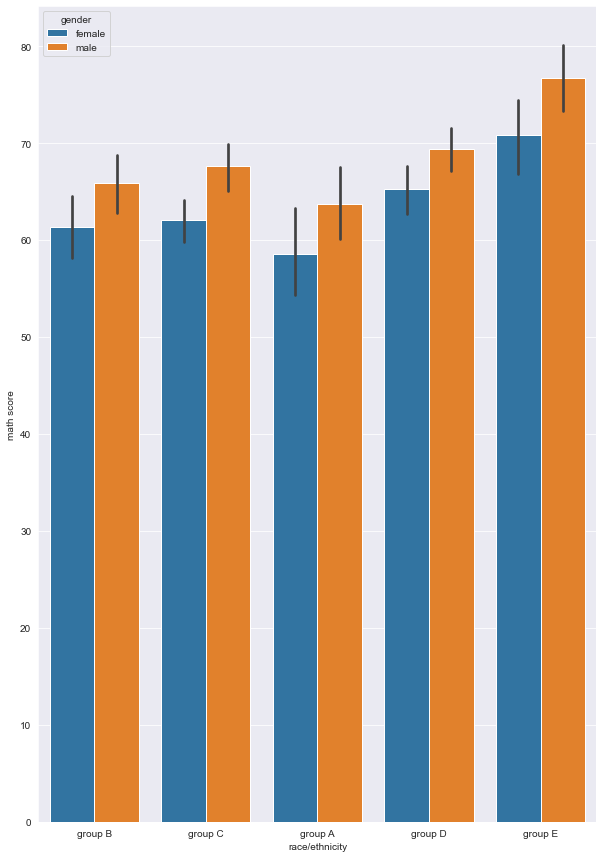

In [14]:
plt.figure(figsize=(10,15))
sns.barplot(x='race/ethnicity',y='math score',data=spf_df,hue='gender')

<AxesSubplot:xlabel='race/ethnicity', ylabel='reading score'>

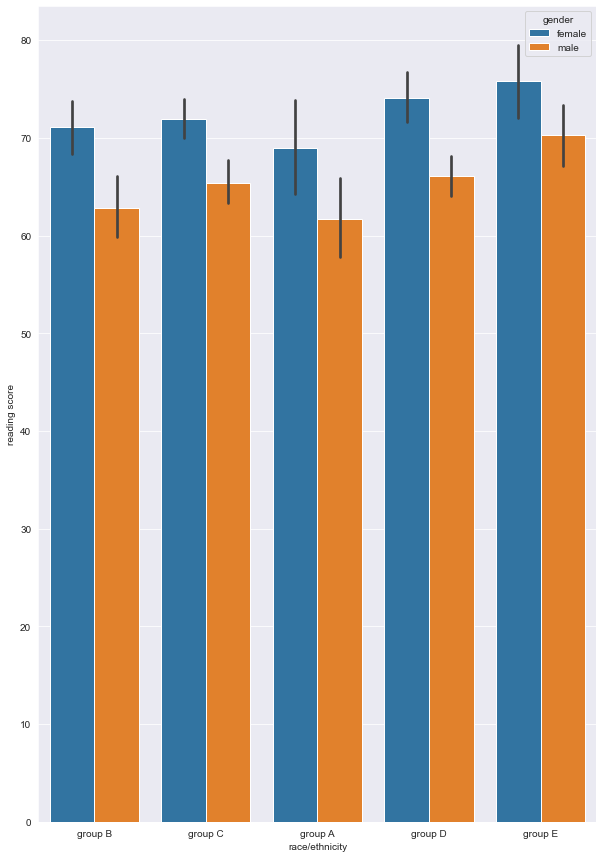

In [15]:
plt.figure(figsize=(10,15))
sns.barplot(x='race/ethnicity',y='reading score',data=spf_df,hue='gender')

<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

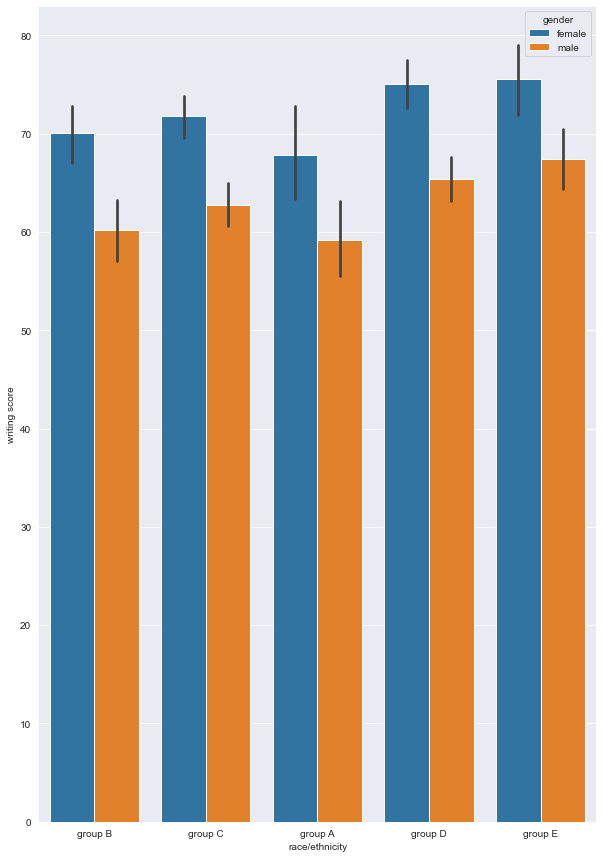

In [16]:
plt.figure(figsize=(10,15))
sns.barplot(x='race/ethnicity',y='writing score',data=spf_df,hue='gender')

In [17]:
spf_df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

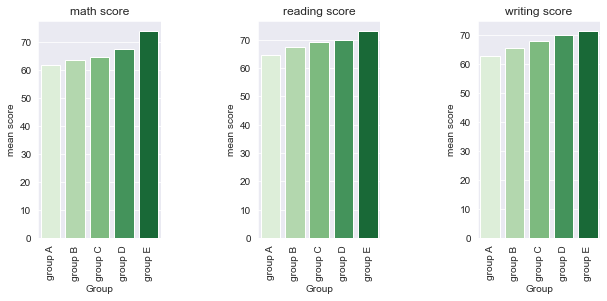

In [18]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = spf_df.groupby("race/ethnicity")[list(spf_df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(spf_df.columns[-3:])[idx])
plt.show()

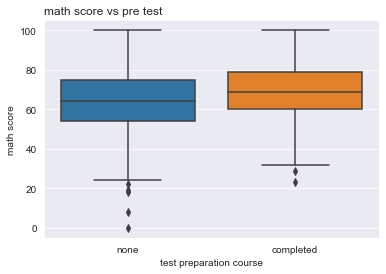

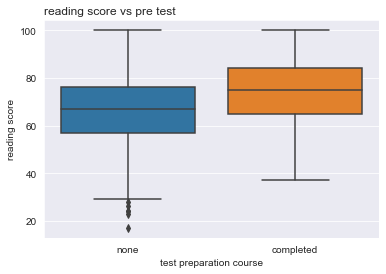

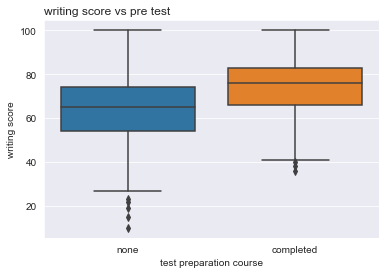

In [19]:
for item in spf_df.columns[-3:]:
    sns.boxplot(x=spf_df["test preparation course"], y=spf_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()
    

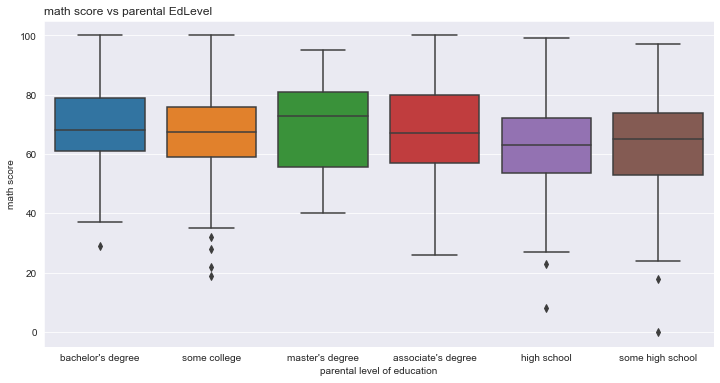

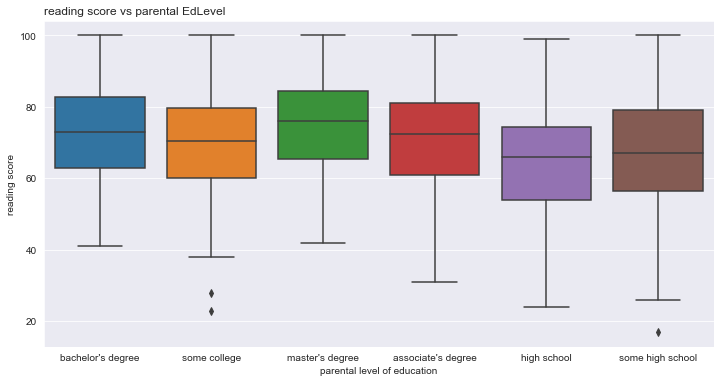

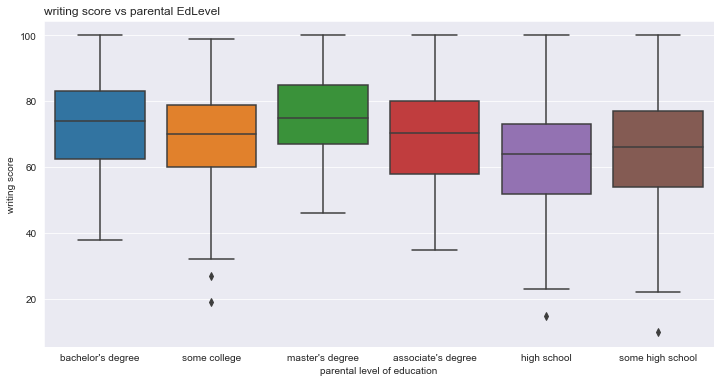

In [20]:

for item in spf_df.columns[-3:]:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=spf_df["parental level of education"], y=spf_df[item])
    plt.title(item+" vs parental EdLevel", loc="left")
    plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


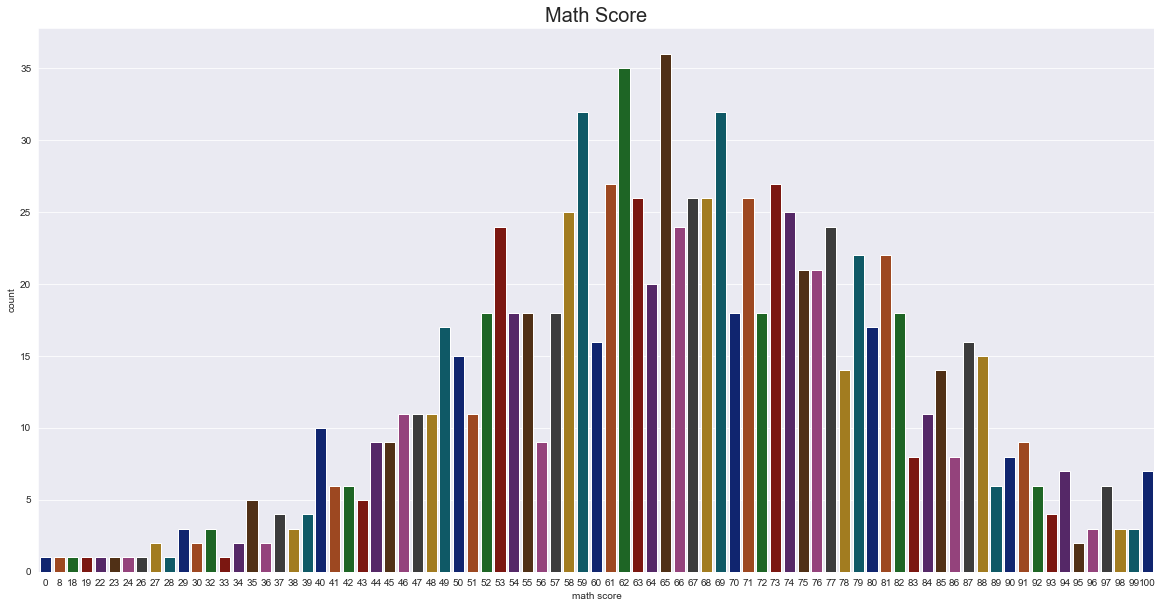

In [21]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(spf_df['math score'], palette = 'dark')
plt.title('Math Score',fontsize = 20)
plt.show()

In [23]:
# gender_df= spf_df['gender']=='female'
# spf_df[gender_df]=0
# gender_df=spf_df['gender']=='male'
# spf_df[gender_df]=1
# spf_df['gender'].value_counts()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_df = spf_df.copy()
train_df["parental level of education"] = labelencoder.fit_transform(train_df["parental level of education"])
train_df["test preparation course"] = labelencoder.fit_transform(train_df["test preparation course"])
train_df["lunch"] = labelencoder.fit_transform(train_df["lunch"])
train_df['gender']= labelencoder.fit_transform(train_df["gender"])
train_df['race/ethnicity']= labelencoder.fit_transform(train_df["race/ethnicity"])
train_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [24]:
spf_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
spf_df['race/ethnicity'].value_counts().sort_values(ascending=True)

group A     89
group E    140
group B    190
group D    262
group C    319
Name: race/ethnicity, dtype: int64

In [30]:
spf_df['parental level of education'].value_counts().sort_values(ascending=True)

master's degree        59
bachelor's degree     118
some high school      179
high school           196
associate's degree    222
some college          226
Name: parental level of education, dtype: int64

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

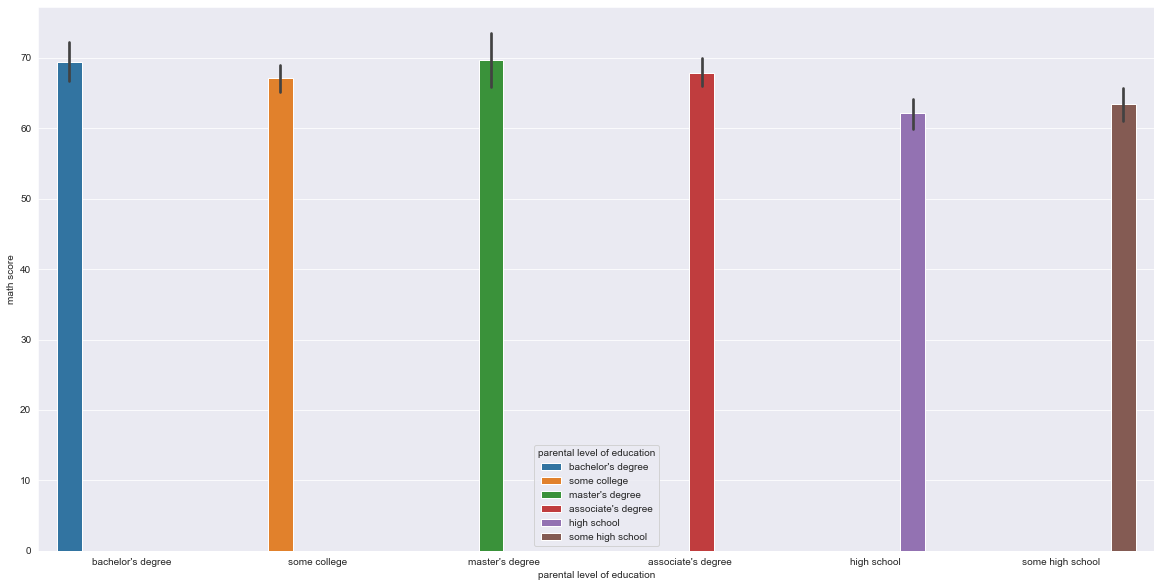

In [32]:
sns.barplot(y='math score',x='parental level of education',data= spf_df,hue='parental level of education')

In [34]:
spf_df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64